   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


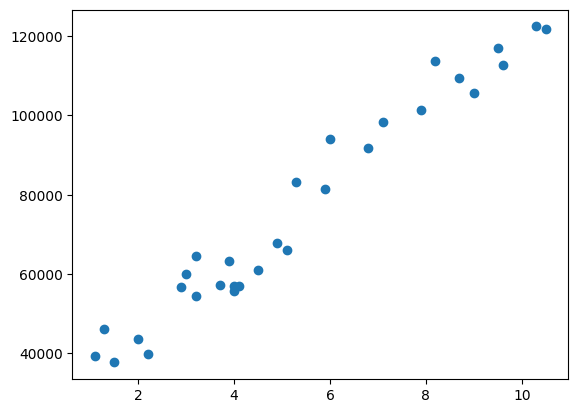

[[9345.94244312]]
[26816.19224403]


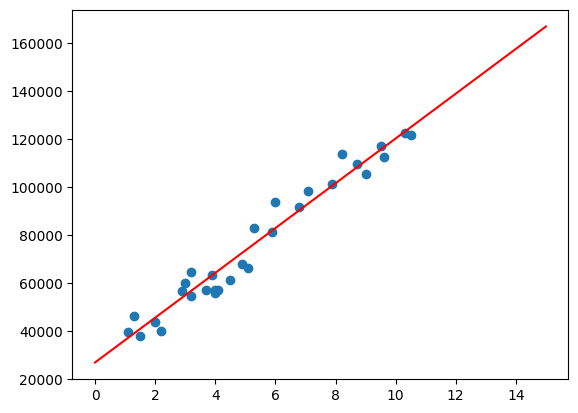

MAE: 3426.4269374307078
MSE: 21026037.329511296
RMSE: 4585.4157204675885
R2: 0.9749154407708353


In [4]:
import pandas as pd # data manipulation of analysis
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Salary_Data.csv') # chargement des donnees a partir d'un fichier csv
                                      # read_csv('') = lecture du fichier csv

data.head() # voir les 5 premieres instances
print(data.head())

data.info() # voir les informations : voir le types de donnees, voir si des donnees sont manquantes
"""                      <class 'pandas.core.frame.DataFrame'>
                            RangeIndex: 30 entries, 0 to 29                 30 entrees differentes
                            Data columns (total 2 columns):                 2 colonnes: "YearsExperience" "Salary"
                            #   Column           Non-Null Count  Dtype  
                            ---  ------           --------------  -----  
                            0   YearsExperience  30 non-null     float64
                            1   Salary           30 non-null     float64
                            dtypes: float64(2)
                            memory usage: 608.0 bytes
                            <class 'pandas.core.frame.DataFrame'>
                            RangeIndex: 30 entries, 0 to 29
                            Data columns (total 2 columns):
                            #   Column           Non-Null Count  Dtype  
                            ---  ------           --------------  -----  
                            0   YearsExperience  30 non-null     float64
                            1   Salary           30 non-null     float64
                            dtypes: float64(2)
                            memory usage: 608.0 bytes """


# Preparation des donnees
# Selectionner les colonnes "YearsExperience" comme variable d'entree
# et la colonne "Salary" comme variable cible
x = data[['YearsExperience']]
y = data[['Salary']]

plt.scatter(x,y)
plt.show()

# Separer la dataset en train et en test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instancier l'algorithme de regression lineaire

regressor.fit(x_train,y_train) # entrainement = produit l'equation lineaire

print(regressor.coef_) # Le coefficient directeur d'une droite est un nombre qui caracterise sa "pente".
                       # Par definition, le coefficient directeur de la droite qui passe par les points
                       # M1 (x1;y1) et M2 (x2;y2) est le quotient (y2-y1)/(x2-x1)
print(regressor.intercept_) # coordonnee a l'origine

# Ajouter la droite sur le graphique
ordonnee = np.linspace(0,15,1000)
plt.scatter(x,y)
plt.plot(ordonnee,regressor.coef_[0]*ordonnee+regressor.intercept_,color='r')
plt.show()

# Prediction sur la base test
y_predict = regressor.predict(x_test) # a partir des donnees x de la base test, on va predire la valeur des y

# Metriques
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_predict))
print('MSE:', metrics.mean_squared_error(y_test,y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2:',metrics.r2_score(y_test,y_predict))